<a href="https://colab.research.google.com/github/Exe-dev/AttractingContributors-POKEMON/blob/add-raula/routine/calculate-task/calculate_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 共創工数集計Notebook

# 使い方
* Cmd+F9(もしくは，ランタイム→すべてのセルを実行)で実行．
* 実行すると，AuthorizeのところでGo to the following link in your browser:って感じでURLが表示されるはず
* URLを踏んでgoogleアカウントでログインして進むと次の画面が出てくる
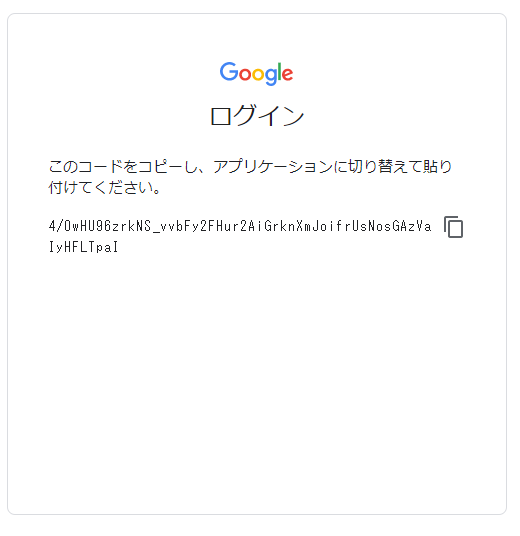
* コードをコピーしてEnter valification codeの横のセルにペーストする(したの画像のところ)
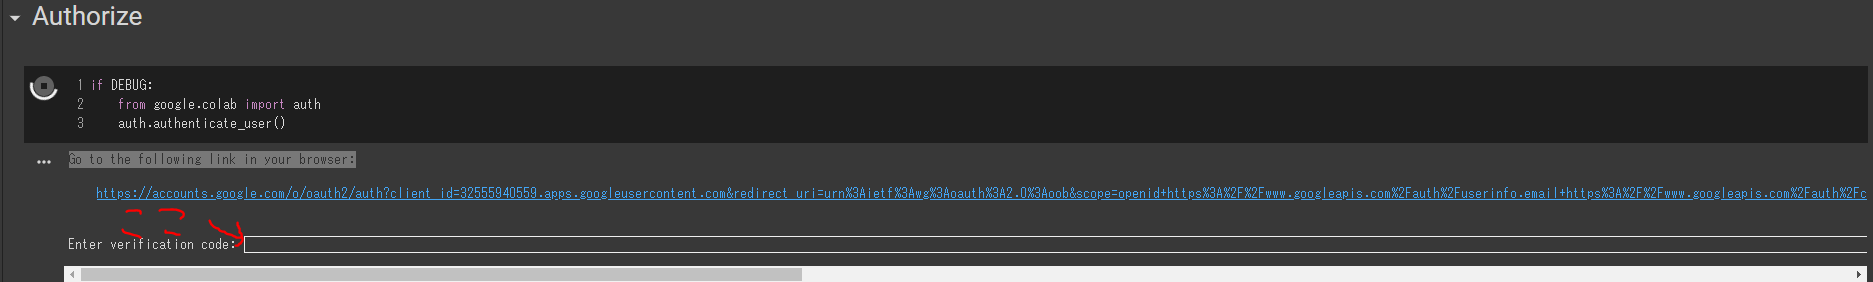
* シートが出力されているはず
* 出力シートのレイアウトは2種類あり，Input Parametersセル内のSHEET_FORMAT = "A"で設定されている，
* SHEET_FORMAT = "A"だと，プロジェクト名がまとまっていない集計になる(共創_Herbert_公式アプリ開発)
* SHEET_FORMAT = "B"だと，プロジェクト名がまとまった集計になる．(共創_Herbert_公式アプリ開発 → 共創_Herbert)
* 入力スプレッドシートは下のInput Parametersセル内で定義
* INPUT_SPREAD_SHEET = 'input_sheets'の'input_sheets'が入力スプレッドシートになる(違うファイルを対象にしたいなら，'input_sheets'→ '自由な名前'と変更すればよい)
* スプレッドシートの保存場所はhttps://drive.google.com/drive/u/4/folders/0AOqUuOha1WqOUk9PVA
* 集計対象は入力スプレッドシートの先頭のシートになるので注意(集計対象のシート名前は自由)

* 同じ日に同じフォーマットの出力をすると，シート名が被ってエラーがでるので注意
* その場合は，新しいファイルを作ってINPUT_SPREAD_SHEETの値を変えて，集計対象のファイルを変更すればよい

# 処理手順
* Google Driveと連携
* 入力シートの読み込み(入力シートは1枚目のシートになるので注意)
* 人とプロジェクト名でGROUPBYしてプロジェクトごとの工数を計算
* レイアウトを整えてシートを出力

# 入力シートのレイアウト
##### 日時	姓 名	総労働時間	プロジェクト名	工数	差異
##### 2020/3/1	島 知寛	0:00	未入力	0:00	0:00
##### 2020/3/1|	井上 暢宏	0:00 	未入力	0:00	|0:00
##### 2020/3/1	一野瀬 翔吾	0:00	未入力	0:00	0:00
##### 2020/3/1	山﨑 郁	8:34	共創_Mark_企画_202003	8:19	0:15

# 出力シートのレイアウト(3通り)
## Aの場合はOUTPUT-A、
## Bの場合はOUTPUT-B、
## Cの場合はOUTPUT-Cが出力される

## OUTPUT-Aはプロジェクト名が細分化されている
#### =======OUTPUT-A========================
######	 高専太郎	高専好子
###### App Ape_支援	0	0
###### Studio_分析_Dashboard	0	1
###### Studio_分析_Monet	0	16
###### C_本部共通（OJT専用）	0	0
#### ========================================

## OUTPUT-Bはプロジェクト名がまとまっている
#### ========OUTPUT-B========================
#####	高専太郎	高専好子
##### App Ape_支援	0	0
##### Studio_分析	0	1
##### Studio_分析	0	16
##### C_本部共通（OJT専用）	0	0
#### ========================================

## OUTPUT-Cは顧客名だけ表示される
#### ========OUTPUT-C========================
#####	高専太郎	高専好子
##### App Ape	0	0
##### 分析	0	1
##### 分析	0	16
##### 本部共通	0	0
#### ========================================


# Version

In [257]:
VERSION = "1"

# Input Parameters
* SHEET_FORMAT = "A" or "B","C"


In [258]:
#出力するファイルがOUTPUT-Aなら"A",OUTPUT-Bなら"B"を入力
SHEET_FORMAT = "C"
INPUT_SPREAD_SHEET = 'input_sheets'
DEBUG = True

# Import libs

In [259]:
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
import datetime
from gspread_dataframe import set_with_dataframe
import re

#dfの漢字をローマ字に変換する

# Authorize

In [260]:
if DEBUG:
    from google.colab import auth
    auth.authenticate_user()

# CSV sheet1 to list

In [261]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open(INPUT_SPREAD_SHEET).sheet1
sh = gc.open(INPUT_SPREAD_SHEET)
rows = worksheet.get_all_values()
rows[0:5]

[['日時', '社員番号', '姓 名', '総労働時間', 'プロジェクト名', '工数', '差異'],
 ['2021/5/1', '8', '室星 亮太', '0:00', '未入力', '0:00', '0:00'],
 ['2021/5/1', '13', '島 知寛', '0:00', '未入力', '0:00', '0:00'],
 ['2021/5/1', '15', '井上 暢宏', '0:00', '未入力', '0:00', '0:00'],
 ['2021/5/1', '17', '吉田 亨', '0:00', '未入力', '0:00', '0:00']]

# list to pandas dataframe

In [262]:
df_input_file = pd.DataFrame.from_records(rows[1:-1])
df_input_file = df_input_file.dropna(how="all")
df_input_file = df_input_file.rename(columns={0:"日時", 1:"社員番号", 2:"姓名", 3:"総労働時間", 4:"プロジェクト名", 5:"工数", 6:"差異"})
df_input_file

,日時,社員番号,姓名,総労働時間,プロジェクト名,工数,差異
0,2021/5/1,8,室星 亮太,0:00,未入力,0:00,0:00
1,2021/5/1,13,島 知寛,0:00,未入力,0:00,0:00
2,2021/5/1,15,井上 暢宏,0:00,未入力,0:00,0:00
3,2021/5/1,17,吉田 亨,0:00,未入力,0:00,0:00
4,2021/5/1,34,一野瀬 翔吾,0:00,未入力,0:00,0:00
...,...,...,...,...,...,...,...
3328,2021/5/31,150,岡崎 三四朗,8:23,Studio_Monet_専属_公式アプリ開発,8:23,0:00
3329,2021/5/31,153,河崎 優子,10:16,Studio_研修,10:16,0:00
3330,2021/5/31,154,富山 佳穂,10:44,Studio_Herbert_専属_オファーアプリ開発,8:00,2:44
3331,2021/5/31,154,富山 佳穂,10:44,全社共通,0:15,10:29


# input sheetsの工数のフォーマットが0:00なので計算しやすいように秒に直す
# Ex. 1:15 => 4500

In [263]:
base_time = pd.to_datetime('00:00', format='%M:%S')
df_input_file["工数"][df_input_file["プロジェクト名"]=="未入力"] = df_input_file["差異"][df_input_file["プロジェクト名"]=="未入力"] #未入力の工数も含めるために差異の値を工数に入れる
df_input_file["工数"] = pd.to_datetime(df_input_file["工数"], errors="coerce", format="%H:%M") - base_time
df_input_file["工数"] = df_input_file["工数"].dt.total_seconds()
df_input_file["総労働時間"] = pd.to_datetime(df_input_file["総労働時間"], errors="coerce", format="%H:%M") - base_time
df_input_file["総労働時間"] = df_input_file["総労働時間"].dt.total_seconds()
df_input_file = df_input_file.dropna(how='all').dropna(how='all', axis=1)
df_input_file

,日時,社員番号,姓名,総労働時間,プロジェクト名,工数,差異
0,2021/5/1,8,室星 亮太,0.0,未入力,0.0,0:00
1,2021/5/1,13,島 知寛,0.0,未入力,0.0,0:00
2,2021/5/1,15,井上 暢宏,0.0,未入力,0.0,0:00
3,2021/5/1,17,吉田 亨,0.0,未入力,0.0,0:00
4,2021/5/1,34,一野瀬 翔吾,0.0,未入力,0.0,0:00
...,...,...,...,...,...,...,...
3328,2021/5/31,150,岡崎 三四朗,30180.0,Studio_Monet_専属_公式アプリ開発,30180.0,0:00
3329,2021/5/31,153,河崎 優子,36960.0,Studio_研修,36960.0,0:00
3330,2021/5/31,154,富山 佳穂,38640.0,Studio_Herbert_専属_オファーアプリ開発,28800.0,2:44
3331,2021/5/31,154,富山 佳穂,38640.0,全社共通,900.0,10:29


# プロジェクト名をまとめる関数

In [264]:
def reduce_prj_name(project_name):
  """
  SHEET_FORMAT="B"の場合にのみ呼び出される関数です.
  "_"を2個以上含むプロジェクト名を,"_"を1個のみ含む名前に短縮します.
  "_"を2個以上含まなければ引数をそのまま返します．
  Ex :input : "共創_ Olafur_企画_202003	" =>　output : "共創_ Olafur"
  """
  splited = project_name.split("_")
  if(len(splited) > 1):
    return splited[0] + "_" + splited[1]
  else: 
    return project_name

In [265]:
def make_customer_name(project_name):
  """
  SHEET_FORMAT="C"の場合にのみ呼び出される関数です.
  "_"を　1個以上含むプロジェクト名を,"_"を含まない名前に短縮します.
  "_"を1個以上含まなければ引数をそのまま返します．
  Ex :input : "共創" =>　output : "共創"
  """
  splited = project_name.split("_")
  if(2<= len(splited) <= 3):
    return re.sub("(\[.*\]\s)|(\[.*\])","",splited[0])
  elif(len(splited) > 3):
    return re.sub("(\[.*\]\s)|(\[.*\])","",splited[1])
  else: 
    return re.sub("(\[.*\]\s)|(\[.*\])","",project_name)

# SHEET_FORMAT==Bの場合にプロジェクト名をまとめる

In [266]:
if SHEET_FORMAT == "B":
  df_input_file["プロジェクト名"] = df_input_file["プロジェクト名"].map(reduce_prj_name)
elif SHEET_FORMAT == "C":
  df_input_file["プロジェクト名"] = df_input_file["プロジェクト名"].map(make_customer_name)

# 人とプロジェクトごとに総工数を計算する

In [267]:
project_manhour = df_input_file.groupby(["姓名","プロジェクト名","社員番号"], as_index=False).sum()
#project_manhour = project_manhour[1:] #[0]が空白の列なので取り除く
project_manhour

,姓名,プロジェクト名,社員番号,総労働時間,工数
0,Yang David,Donald,87,464580.0,424080.0
1,Yang David,Herbert,87,28860.0,900.0
2,Yang David,全社共通,87,31320.0,7200.0
3,Yang David,全社支援,87,82500.0,32400.0
4,Yang David,共通,87,57600.0,57600.0
...,...,...,...,...,...
352,陳 俐ロン,Pamela,126,30060.0,5400.0
353,陳 俐ロン,全社共通,126,445500.0,8400.0
354,陳 俐ロン,共通,126,28800.0,28800.0
355,陳 俐ロン,未入力,126,0.0,0.0


## 入力漏れの工数計算

In [268]:
df_none_count = df_input_file.groupby(["日時","姓名","社員番号"], as_index=False).sum()
df_none_count.insert(1,"プロジェクト名","入力漏れ")
df_none_count["工数"] = df_none_count["総労働時間"]-df_none_count["工数"]
df_none_count = df_none_count.groupby(["姓名","プロジェクト名","社員番号"], as_index=False).sum()
df_none_count

,姓名,プロジェクト名,社員番号,総労働時間,工数
0,Yang David,入力漏れ,87,664860.0,142680.0
1,一野瀬 翔吾,入力漏れ,34,644760.0,124980.0
2,一野瀬 麻里奈,入力漏れ,77,1343520.0,751680.0
3,久保 楓,入力漏れ,149,1248300.0,721980.0
4,井上 暢宏,入力漏れ,15,1127880.0,605940.0
...,...,...,...,...,...
58,長谷川 泰斗,入力漏れ,1048,463440.0,0.0
59,関 学,入力漏れ,88,1384740.0,791040.0
60,関根 悠生,入力漏れ,111,1164540.0,624960.0
61,阿部 優太,入力漏れ,128,894660.0,419700.0


In [269]:
project_manhour = pd.concat([project_manhour, df_none_count]).reset_index(drop=True)
project_manhour

,姓名,プロジェクト名,社員番号,総労働時間,工数
0,Yang David,Donald,87,464580.0,424080.0
1,Yang David,Herbert,87,28860.0,900.0
2,Yang David,全社共通,87,31320.0,7200.0
3,Yang David,全社支援,87,82500.0,32400.0
4,Yang David,共通,87,57600.0,57600.0
...,...,...,...,...,...
415,長谷川 泰斗,入力漏れ,1048,463440.0,0.0
416,関 学,入力漏れ,88,1384740.0,791040.0
417,関根 悠生,入力漏れ,111,1164540.0,624960.0
418,阿部 優太,入力漏れ,128,894660.0,419700.0


# レイアウトを整えてデータの欠損を埋める


In [270]:
df_output=project_manhour.pivot(index="プロジェクト名", columns="姓名",values="工数")
df_output = df_output.fillna("0.0")
df_output = df_output.astype(float)
df_output.loc["総工数"] = df_output.sum()
df_output["プロジェクトの総工数"] = df_output.sum(axis=1)
df_output = df_output.applymap(lambda x:str((int)(x//3600)) + ":" + str((int)(x%3600)//60)+":00")
df_output.index.name = ""
df_output.columns.name = ""
df_output

,Yang David,一野瀬 翔吾,一野瀬 麻里奈,久保 楓,井上 暢宏,伊禮 吉充,伊藤 裕一,住安 宏介,倉知 正行,南 保佳,原 智美,古堂 淳也,古澤 竜郎,吉田 亨,大藤 淳,奥澤 俊樹,室星 亮太,室星 幾惠,宮﨑 朋美,富山 佳穂,小島 実奈,小林 秀匡,小林 達之,小野田 洋幸,山﨑 郁,岡 裕也,岡崎 三四朗,島 知寛,幸田 美紀子,文 裕誠,曽我部 愛子,服部 卓史,杉野 和馬,松岡 和可奈,林 瑞穂,柿田 亘,榊原 信也,氏川 博光,永光 彩,河崎 優子,渡邊 雄大,田中 啓子,田中 大貴,田口 浩行,畠山 創太,福嶋 真也,秋田 浩孝,竹内 文郎,筒井 規子,糸島 裕司,紀村 理奈,羽場 睦月,諏訪 生真,谷津 貢,金澤 創平,鈴木 大二,鈴木 寛大,長島 未来弥,長谷川 泰斗,関 学,関根 悠生,阿部 優太,陳 俐ロン,プロジェクトの総工数
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ufan,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,1:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,15:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,16:30:00
Dali,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,1:52:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,1:52:00
Degas,0:0:00,0:0:00,0:0:00,0:0:00,8:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,3:30:00,0:0:00,0:0:00,0:0:00,0:0:00,147:16:00,0:0:00,0:0:00,0:0:00,53:25:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,5:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,139:46:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,357:57:00
Donald,117:48:00,0:0:00,3:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,93:14:00,0:0:00,41:52:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,49:45:00,0:0:00,5:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,69:37:00,156:29:00,0:0:00,0:0:00,121:49:00,0:0:00,0:0:00,0:0:00,0:0:00,1:22:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,140:54:00,0:0:00,59:21:00,0:0:00,0:0:00,0:0:00,70:3:00,0:0:00,0:0:00,0:0:00,930:14:00
Frost,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,36:48:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,56:5:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,16:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,32:16:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,141:9:00
Herbert,0:15:00,0:0:00,0:0:00,0:0:00,51:36:00,66:22:00,146:37:00,0:0:00,0:0:00,0:0:00,0:0:00,140:42:00,0:0:00,0:0:00,159:28:00,0:0:00,0:0:00,0:0:00,0:0:00,40:0:00,0:0:00,0:0:00,145:26:00,0:0:00,152:22:00,0:0:00,0:0:00,19:57:00,0:0:00,0:0:00,0:0:00,0:0:00,1:30:00,0:0:00,0:0:00,0:0:00,0:0:00,20:40:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,83:2:00,0:0:00,95:31:00,123:39:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,68:52:00,137:43:00,0:0:00,5:23:00,1459:5:00
Hirst,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,87:21:00,0:0:00,0:0:00,0:0:00,0:0:00,53:14:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,69:44:00,0:0:00,0:0:00,141:1:00,0:0:00,0:0:00,0:0:00,46:17:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,120:25:00,0:0:00,0:0:00,0:0:00,54:32:00,57:14:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,629:48:00
Innocean,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0

# 列を社員番号順にソートする

In [271]:
df_employees = df_input_file.groupby(["姓名","社員番号"])
df_employees = df_employees.sum().reset_index()
df_employees["社員番号"] = df_employees["社員番号"].astype(int)
df_employees = df_employees.sort_values("社員番号").reset_index(drop=True)
df_employees

,姓名,社員番号,総労働時間,工数
0,室星 亮太,8,781560.0,543480.0
1,島 知寛,13,1397640.0,616800.0
2,井上 暢宏,15,1127880.0,521940.0
3,吉田 亨,17,873600.0,471240.0
4,一野瀬 翔吾,34,644760.0,519780.0
...,...,...,...,...
58,諏訪 生真,1055,184800.0,184800.0
59,小島 実奈,1056,179100.0,179100.0
60,住安 宏介,1057,215160.0,215160.0
61,鈴木 大二,1059,230520.0,215460.0


# indexの順番を整える

In [272]:
index = df_output.index.to_list()
index.remove("入力漏れ")
index.remove("総工数")
index.append("入力漏れ")
index.append("総工数")
df_output = df_output.loc[index]

In [273]:
df_output = df_output.reindex(columns=df_employees["姓名"].to_list())
df_output

,室星 亮太,島 知寛,井上 暢宏,吉田 亨,一野瀬 翔吾,山﨑 郁,服部 卓史,秋田 浩孝,柿田 亘,伊禮 吉充,一野瀬 麻里奈,宮﨑 朋美,氏川 博光,畠山 創太,Yang David,関 学,永光 彩,室星 幾惠,林 瑞穂,福嶋 真也,古澤 竜郎,田中 大貴,奥澤 俊樹,伊藤 裕一,関根 悠生,渡邊 雄大,田口 浩行,古堂 淳也,松岡 和可奈,竹内 文郎,原 智美,榊原 信也,南 保佳,陳 俐ロン,阿部 優太,田中 啓子,筒井 規子,金澤 創平,倉知 正行,長島 未来弥,小野田 洋幸,大藤 淳,岡 裕也,鈴木 寛大,小林 秀匡,小林 達之,文 裕誠,曽我部 愛子,幸田 美紀子,谷津 貢,杉野 和馬,糸島 裕司,久保 楓,岡崎 三四朗,河崎 優子,富山 佳穂,長谷川 泰斗,紀村 理奈,諏訪 生真,小島 実奈,住安 宏介,鈴木 大二,羽場 睦月
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ufan,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,1:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,15:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Dali,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,1:52:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Degas,0:0:00,53:25:00,8:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,3:30:00,0:0:00,0:0:00,0:0:00,0:0:00,5:30:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,139:46:00,0:0:00,0:0:00,147:16:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Donald,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,3:0:00,0:0:00,1:22:00,0:0:00,117:48:00,70:3:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,41:52:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,93:14:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,5:0:00,156:29:00,0:0:00,69:37:00,140:54:00,121:49:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,49:45:00,0:0:00,59:21:00,0:0:00
Frost,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,32:16:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,56:5:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,16:0:00,36:48:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Herbert,0:0:00,19:57:00,51:36:00,0:0:00,0:0:00,152:22:00,0:0:00,0:0:00,0:0:00,66:22:00,0:0:00,0:0:00,20:40:00,0:0:00,0:15:00,68:52:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,146:37:00,137:43:00,0:0:00,0:0:00,140:42:00,0:0:00,83:2:00,0:0:00,0:0:00,0:0:00,5:23:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,159:28:00,0:0:00,0:0:00,0:0:00,145:26:00,0:0:00,0:0:00,0:0:00,0:0:00,1:30:00,95:31:00,0:0:00,0:0:00,0:0:00,40:0:00,0:0:00,123:39:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Hirst,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,87:21:00,0:0:00,69:44:00,54:32:00,0:0:00,0:0:00,0:0:00,57:14:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,120:25:00,0:0:00,53:14:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,46:17:00,0:0:00,141:1:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00
Innocean,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,18:8:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0:00,0:0

# output new sheet

In [274]:
try:
  sh.del_worksheet(sh.worksheet("OUTPUT-" + SHEET_FORMAT + datetime.datetime.now().strftime("%Y-%m-%d")))
except:
  print("not exists")

In [275]:
new_worksheet = sh.add_worksheet(title= "OUTPUT-" + SHEET_FORMAT + datetime.datetime.now().strftime("%Y-%m-%d") , rows="100", cols="100")
set_with_dataframe(new_worksheet, df_output,resize=True, include_index=True, allow_formulas=True)